In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import os
import seaborn as sns
import pandas as pd
markers = itertools.cycle(['o','s','v', '+'])


directory = "../results/disorder/PBC/"

In [2]:
# Function to convert  
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += str(ele)  
    
    # return string  
    return str1 

In [3]:
def filesToDataFrame(directory, file_begin, L_chain, distinguisher : str):
    df = pd.DataFrame()
    for filename in os.listdir(directory):
        splitter = filename[:-4].split(",")
        L = 0
        g = 0
        h = 0
        w = 0
        label = ""
        skip = False
        
        for item in splitter:                           # take the parameters divided by commas, last split is because we have .dat
            split_item = item.split("=")                  # take values for the parameters
            #print(split_item)
            if split_item[0] == "_L":
                L = int(split_item[1])
                if L != L_chain:
                    skip = True
                    break
            elif split_item[0] == "h":
                h = float(split_item[1])
                if distinguisher == split_item[0]:
                    label = item
            elif split_item[0] == "g":
                g = float(split_item[1])
                if distinguisher == split_item[0]:
                    label = item
            elif split_item[0] == "w":
                w = float(split_item[1])
                if distinguisher == split_item[0]:
                    label = item
        if splitter[0] == file_begin and not skip:
            tmp = pd.read_csv(directory + filename, sep = "\t", names = ["proba",label])
            #tmp.dropna()
            #tmp = tmp.astype(float)
            #print(tmp)
            df['proba']= tmp["proba"]
            df[label] = tmp[label]
    df.index = df['proba']
    df.drop(columns = ['proba'], inplace = True)
    return df
                    
df = filesToDataFrame(directory + "sigma_proba/", "ProbDistSigmaX", 7, "w")  
#print(df)
print(df.where(df["w=0.00"] > 0).dropna())
               

       w=0.00  w=0.10  w=0.20  w=0.30  w=0.40  w=0.50  w=0.60  w=0.70  w=0.80  \
proba                                                                           
-0.91    0.02    0.00    0.00    0.00    0.00    0.00    0.00    0.02    0.00   
-0.90    0.06    0.00    0.00    0.00    0.00    0.00    0.02    0.02    0.00   
-0.89    0.06    0.02    0.00    0.00    0.00    0.02    0.02    0.00    0.02   
-0.88    0.02    0.04    0.00    0.00    0.04    0.00    0.00    0.00    0.00   
-0.87    0.14    0.02    0.00    0.04    0.02    0.06    0.00    0.00    0.02   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 0.86    0.24    0.20    0.02    0.08    0.10    0.04    0.04    0.02    0.00   
 0.87    0.12    0.04    0.04    0.06    0.06    0.12    0.06    0.00    0.04   
 0.88    0.20    0.10    0.06    0.02    0.04    0.02    0.06    0.06    0.06   
 0.89    0.20    0.14    0.16    0.12    0.04    0.04    0.02    0.08    0.04   
 0.90    0.04    0.04    0.0

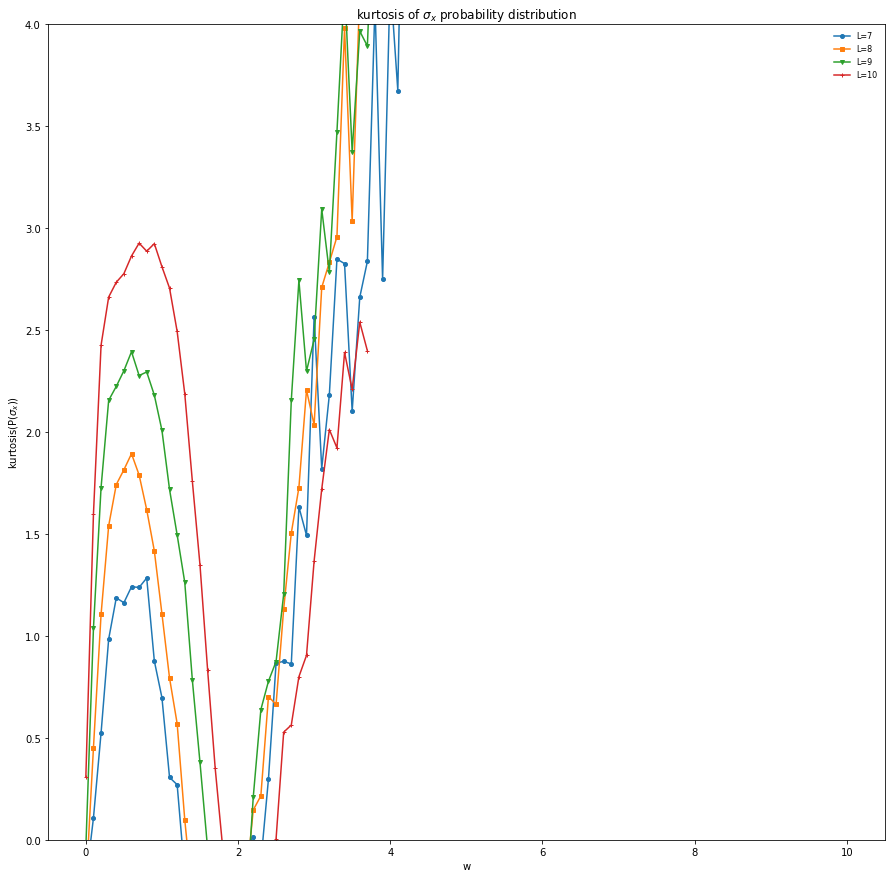

In [5]:
def plotKurtosisFromDF(directory,name_of_file_start, x_distinguisher, Ls):
    
    fig, ax = plt.subplots(figsize=(15,15))
    labels = []
    for L in Ls:
        pd = filesToDataFrame(directory, name_of_file_start, L, x_distinguisher)
        values = []
        kurto = []
        if not pd.empty:
            labels.append("L=" + str(L))
                     
            kurtos = pd.kurtosis(axis = 0)
            kurto = [a for a in kurtos]
            values = [float(x.split("=")[-1]) for x in kurtos.index]                 # list of possible x_disting values
            #print(kurto)
            #print(values)
            # print(len(kurto))
            # print(len(values))
            order = np.argsort(values)
            
            
            ax.plot(np.array(values)[order], np.array(kurto)[order],
                    linewidth = 1.5,
                    marker = next(markers),
                    markersize = 4
                )
    #print(labels)       
    ax.set(title = "kurtosis of $\sigma _x$ probability distribution"
    , xlabel = x_distinguisher
    , ylabel = "kurtosis(P($\sigma _x$))")
    ax.legend(labels
      , frameon=False
      , loc='best'
      , fontsize=8)
    #ax.set_xlim([-0,1.8])
    ax.set_ylim([0,4])
    plt.savefig(directory + "kurtosis_" + name_of_file_start + ".png")
    plt.show()

plotKurtosisFromDF(directory + "sigma_proba/", "ProbDistSigmaX", "w", [7,8,9,10])

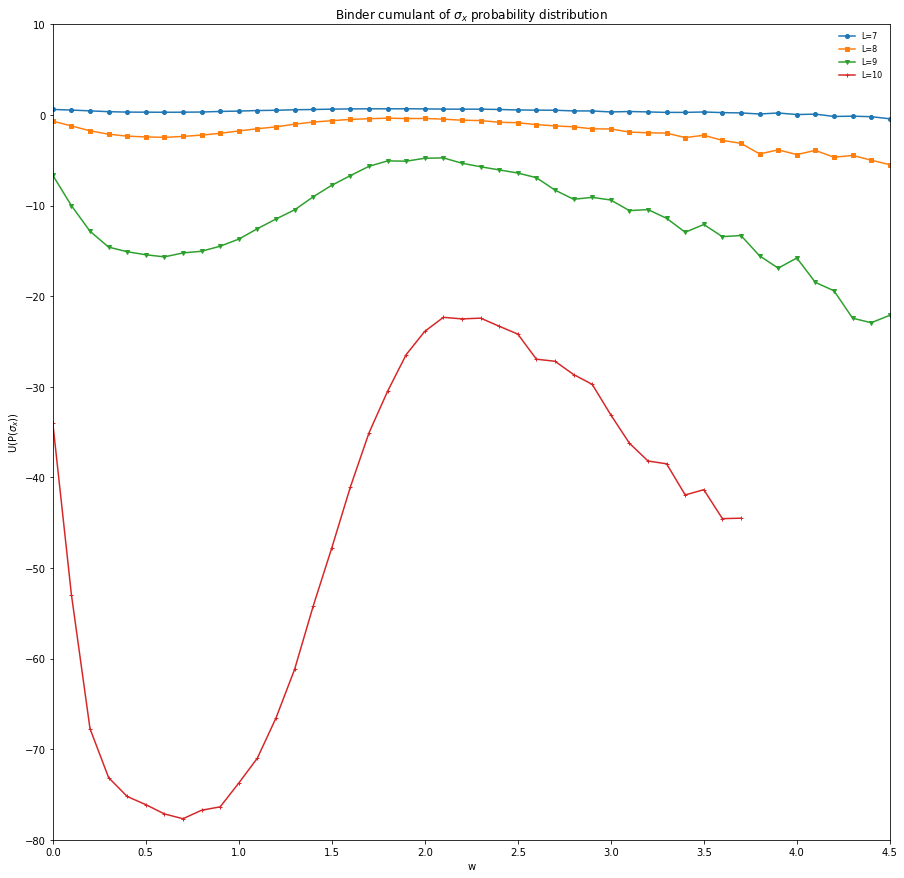

In [6]:

def plotBinderFromDF(directory,name_of_file_start, x_distinguisher, Ls):
    
    fig, ax = plt.subplots(figsize=(15,15))
    labels = []
    for L in Ls:
        pd = filesToDataFrame(directory, name_of_file_start, L, x_distinguisher)
        values = []
        binder = []
        if not pd.empty:
            labels.append("L=" + str(L))
            
            square_pd = pd.apply(np.square, axis =1)
            fourth_pd=square_pd.apply(np.square, axis = 1)
            
            #print(square_pd)
            
            fourth_mean = [fourth_pd[a].mean() for a in fourth_pd.columns]
            square_mean = [square_pd[a].mean() for a in square_pd.columns]

            
            for i in range(len(square_mean)):
                binder.append(1 - fourth_mean[i]/(3*square_mean[i]))
            ##print(binder)
            values = [float(x.split("=")[-1]) for x in pd.columns]                 # list of possible x_disting values
            
            order = np.argsort(values)
            #print(kurto)
            #print(values)
            # print(len(kurto))
            # print(len(values))
            ax.plot(np.array(values)[order], np.array(binder)[order],
                    linewidth = 1.5,
                    marker = next(markers),
                    markersize = 4
            )
    #print(labels)       
    ax.set(title = "Binder cumulant of $\sigma _x$ probability distribution"
    , xlabel = x_distinguisher
    , ylabel = "U(P($\sigma _x$))")
    ax.legend(labels
      , frameon=False
      , loc='best'
      , fontsize=8)
    ax.set_xlim([-0,4.5])
    ax.set_ylim([-80,10])
    plt.savefig(directory + "kurtosis_" + name_of_file_start + ".png")
    plt.show()

plotBinderFromDF(directory + "sigma_proba/", "ProbDistSigmaX", "w", [7,8,9,10])

<ipython-input-7-f452ce314e56>:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tmp = pd.read_csv(folder + filename, sep = "\t\t",index_col=0, names = ['E','Sx'])
<ipython-input-7-f452ce314e56>:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tmp = pd.read_csv(folder + filename, sep = "\t\t",index_col=0, names = ['E','Sx'])


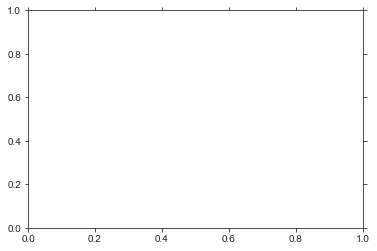

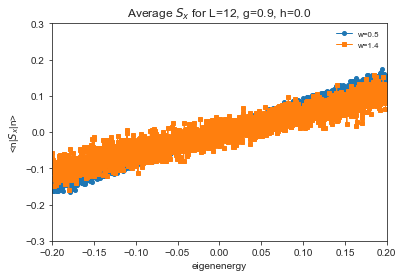

In [7]:
def plot_av_Sx(L,g,h,w, directory):
    try:
        plt.clf()
        plt.cla()
        folder = directory + '/av_Sx/'
        if not os.path.isdir(folder):
            os.mkdir(folder)
    except OSError:
        print("Creation of the directory %s failed" % (folder))
    else:
        sns.set_style("ticks")
        fig, ax = plt.subplots()
        legend = []
        title = "Average $S_x$ for L=" + str(L) + ", g=" + str(g) + ", h=" +str(h) 
        savefile = "avSx_L=" + str(L) + ",g=" + str(g) + ",h=" +str(h) + ",w="
        for filename in os.listdir(folder):
            if (filename[0:3] == "Sx_" and (filename[-4:] == '.txt' or filename[-4:] == '.dat')):
                splitter = filename[3:-4].split(',')
                # L, g, h, w
                splitter = [float(a.split('=')[-1]) for a in splitter]
                if (L == splitter[0] and g == splitter[1] and h == splitter[2] and splitter[3] in w):
                    #print(splitter)
                    legend.append("w=" + str(splitter[3]))
                    savefile = savefile + str(splitter[3])+","
                    tmp = pd.read_csv(folder + filename, sep = "\t\t",index_col=0, names = ['E','Sx'])
                    #print(tmp)
                    # PLOT 
                    tmp.plot(ax = ax
                            , linewidth=1
                            , marker=next(markers)
                            , markersize=4)
                    
        ax.set(title = title
            , xlabel = "eigenenergy"
            , ylabel = "<n|$S_x$|n>")
        ax.legend(legend
              , frameon=False
              , loc='best'
              , fontsize=8)
        ax.set_xlim([-0.2,0.2])
        ax.set_ylim([-0.3,0.3])
        plt.savefig(folder + savefile[:-1] + ".png")
        plt.show()

                    
plot_av_Sx(12,0.90,0.0,[0.00,0.50,1.40],"../results/disorder/")    

[12.0, 0.9, 0.0]


<ipython-input-9-2f188b0074b9>:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tmp = pd.read_csv(folder + filename, sep = "\t\t", names = ['w','bucket','r'])


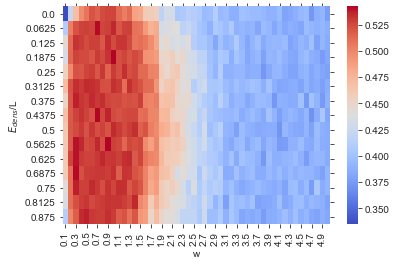

In [9]:
def plot_r_phase(L,g,h, directory):
    try:
        plt.clf()
        plt.cla()
        folder = directory + '/r_phase/'
        if not os.path.isdir(folder):
            os.mkdir(folder)
    except OSError:
        print("Creation of the directory %s failed" % (folder))
    else:
        sns.set_style("ticks")
        #fig, ax = plt.subplots()
        title = "r participation for L=" + str(L) + ", g=" + str(g) + ", h=" +str(h) 
        savefile = "r_L=" + str(L) + ",g=" + str(g) + ",h=" +str(h)
        for filename in os.listdir(folder):
            if (filename.startswith("PhaseDiagram") and (filename[-4:] == '.txt' or filename[-4:] == '.dat')):
                splitter = filename[:-4].split('_')[-1].split(',')
                # L, g, h, w
                splitter = [float(a.split('=')[-1]) for a in splitter]
                if (L == splitter[0] and g == splitter[1] and h == splitter[2]):
                    print(splitter)
                    tmp = pd.read_csv(folder + filename, sep = "\t\t", names = ['w','bucket','r'])
                    tmp.dropna()
                    #print(tmp)
                    tmp = tmp[tmp['r'] != 0.0]

                    #print(tmp)
                    pivotted= tmp.pivot('bucket','w','r')
                    # PLOT 
                    r = np.array(tmp['r'])
                    
                    sns.heatmap(pivotted,cmap='coolwarm',vmin=np.min(r), vmax=np.max(r))
                    
    
    plt.ylabel("$E_{dens}$/L")
    plt.savefig(folder + savefile + ".png")
    plt.show()                


                    
plot_r_phase(12,0.9,0.0,"../results/disorder/") 